In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/climate-and-energy-consumption-dataset-20202024/global_climate_energy_2020_2024.csv


In [13]:
df=pd.read_csv("/kaggle/input/climate-and-energy-consumption-dataset-20202024/global_climate_energy_2020_2024.csv")

# Initial Inspection

In [14]:
print(df.shape)
df.sample(7)

(36540, 10)


,date,country,avg_temperature,humidity,co2_emission,energy_consumption,renewable_share,urban_population,industrial_activity_index,energy_price
2894,2022-12-03,France,10.46,65.36,481.93,2159.22,18.84,83.52,67.47,92.52
17730,2023-07-11,United Kingdom,4.43,67.65,518.02,5519.48,12.77,82.22,65.41,87.00
26567,2022-09-16,China,3.66,57.24,521.19,15742.41,15.51,62.48,80.75,49.53
17446,2022-09-30,United Kingdom,0.49,43.37,414.96,6838.60,22.02,72.12,60.05,189.56
10635,2024-02-09,Sweden,19.18,59.38,363.91,11882.76,21.53,76.18,64.10,93.34
26976,2023-10-30,China,4.61,75.14,777.84,13200.24,22.39,84.41,99.61,189.19
35920,2023-04-22,Indonesia,18.28,35.42,635.06,14683.01,18.68,71.36,43.11,46.46


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36540 entries, 0 to 36539
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       36540 non-null  object 
 1   country                    36540 non-null  object 
 2   avg_temperature            36540 non-null  float64
 3   humidity                   36540 non-null  float64
 4   co2_emission               36540 non-null  float64
 5   energy_consumption         36540 non-null  float64
 6   renewable_share            36540 non-null  float64
 7   urban_population           36540 non-null  float64
 8   industrial_activity_index  36540 non-null  float64
 9   energy_price               36540 non-null  float64
dtypes: float64(8), object(2)
memory usage: 2.8+ MB


In [16]:
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)

datetime64[ns]


# Exploratory Data Analysis (EDA)

Q1) What is the trend of average temperature over time?

The global average temperature shows a clear annual cyclical pattern, likely representing the seasonal changes across the northern and southern hemispheres included in the dataset.

Q2) How does CO2 emission vary across different countries?

The average CO2 emission varies significantly by country, with the USA having the highest average, followed by China and then Germany.

Q3) Is there a correlation between energy consumption and CO2 emission?

There is a clear positive correlation between energy consumption and CO2 emission, suggesting that as energy demand increases, the corresponding CO2 output tends to rise.

Q4) What is the distribution of the renewable share in energy?

The distribution of the renewable share is somewhat bimodal, with a larger peak around a 10-20% share and another peak around 60%. This indicates that countries are generally polarized between those with low or high renewable energy adoption.

Q5) How does the urban population correlate with industrial activity?

There is no single strong linear correlation visible across all countries. The distribution of points is clustered by country, suggesting that the relationship between urban population and industrial activity is highly country-specific.

Q6) How have energy prices changed over time in a specific country (e.g., Germany)?

Energy prices in Germany show significant volatility over the period, with noticeable peaks and troughs, especially towards the latter half of the data (post-2022).

Q7) How do temperature, humidity, and CO2 emission interact? (2D scatter with color for CO2)

High CO2 emissions (indicated by the yellow color) seem to occur across a wide range of temperatures and humidity levels. However, the densest areas of high CO2 (brightest yellow) appear to be clustered around moderate temperatures and a full range of humidity values.

Q8) How does the renewable share relate to energy consumption across countries?

China shows the lowest median and spread of the renewable share, while Brazil and India show the highest median renewable share. This highlights significant differences in renewable energy implementation strategies across these major economies.

Q9) Which countries have the highest average energy consumption? (Top 5)

The United States has the highest average energy consumption by a considerable margin, followed by China. This highlights the substantial energy demands of these major economies.

Q10) Which countries have the highest average renewable share? (Top 5)

Brazil leads the world in average renewable share among the countries in this dataset, followed closely by India and then the USA. This indicates strong performance in renewable energy integration by these nations.

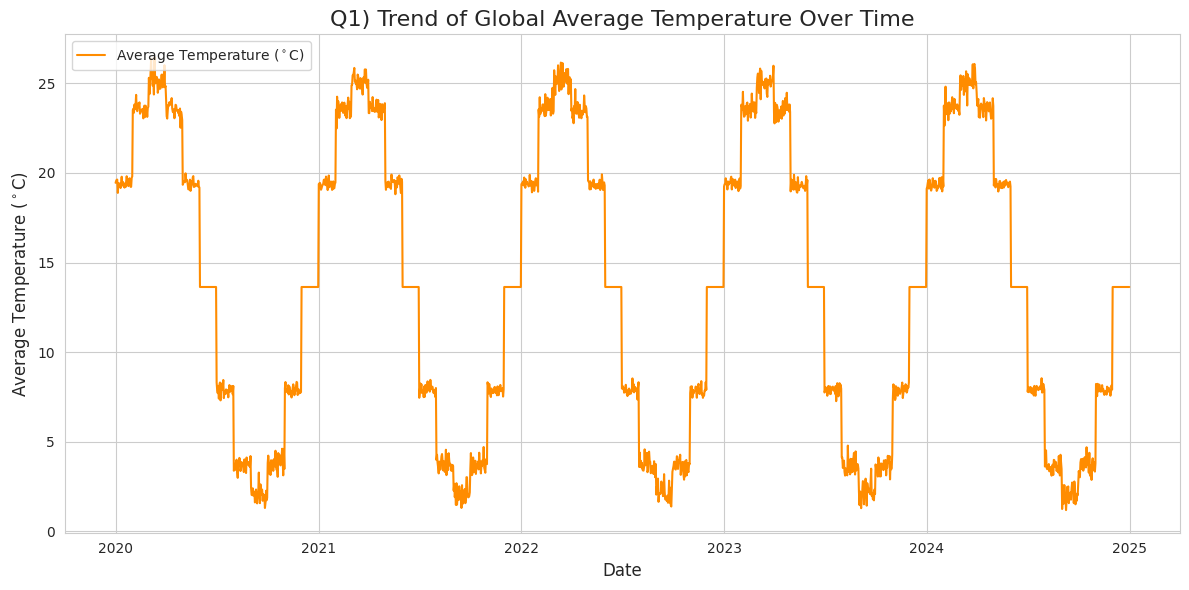

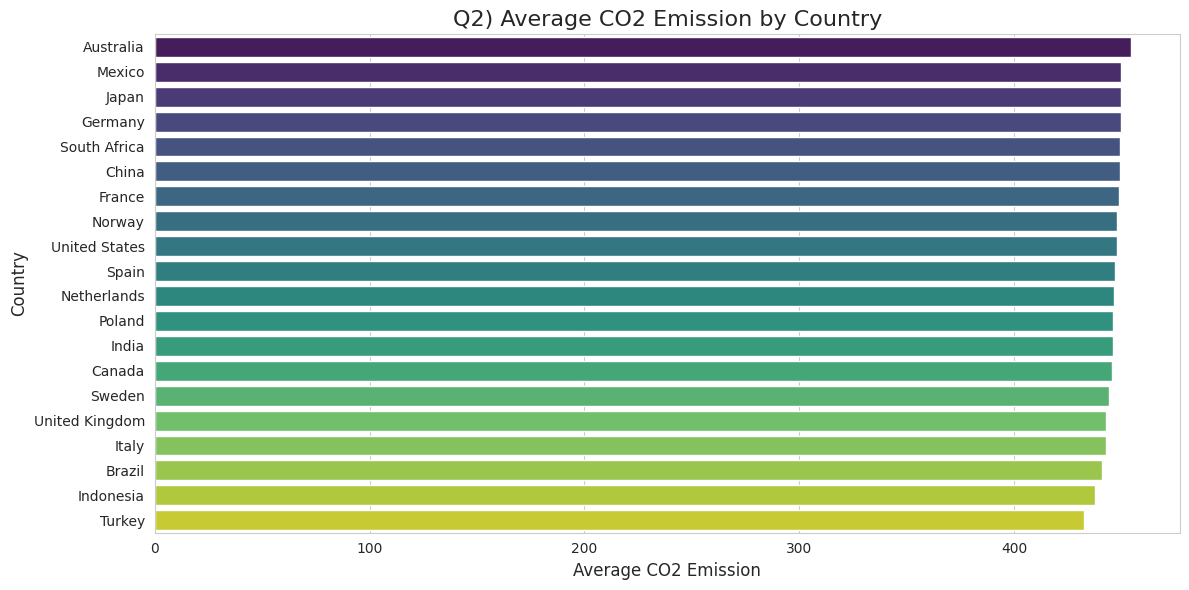

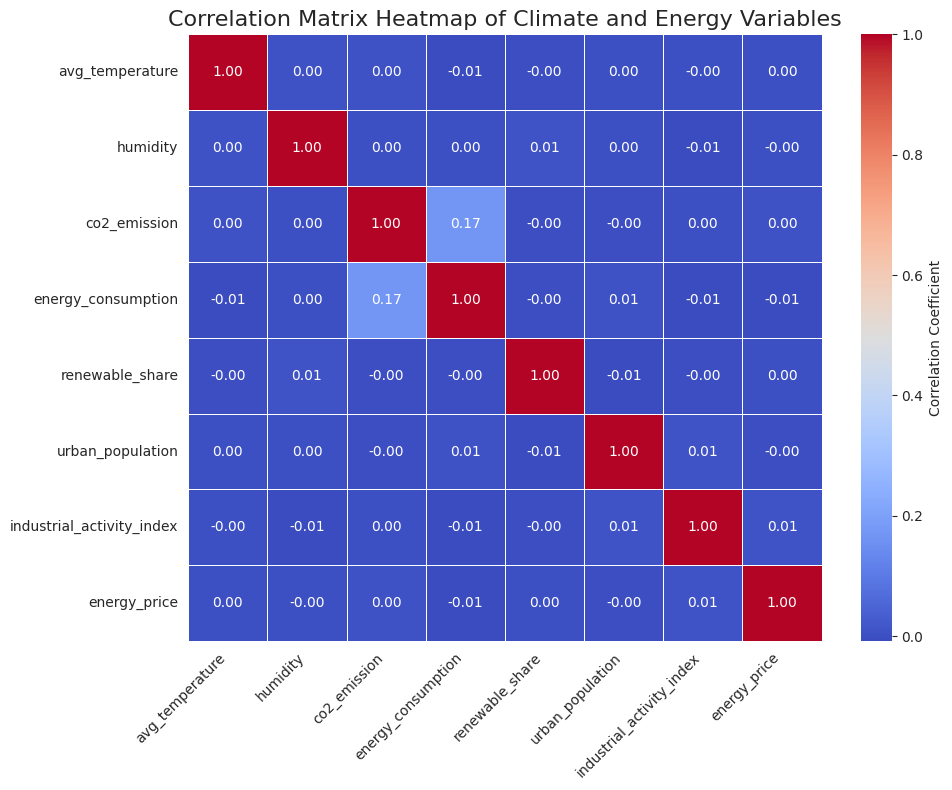

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


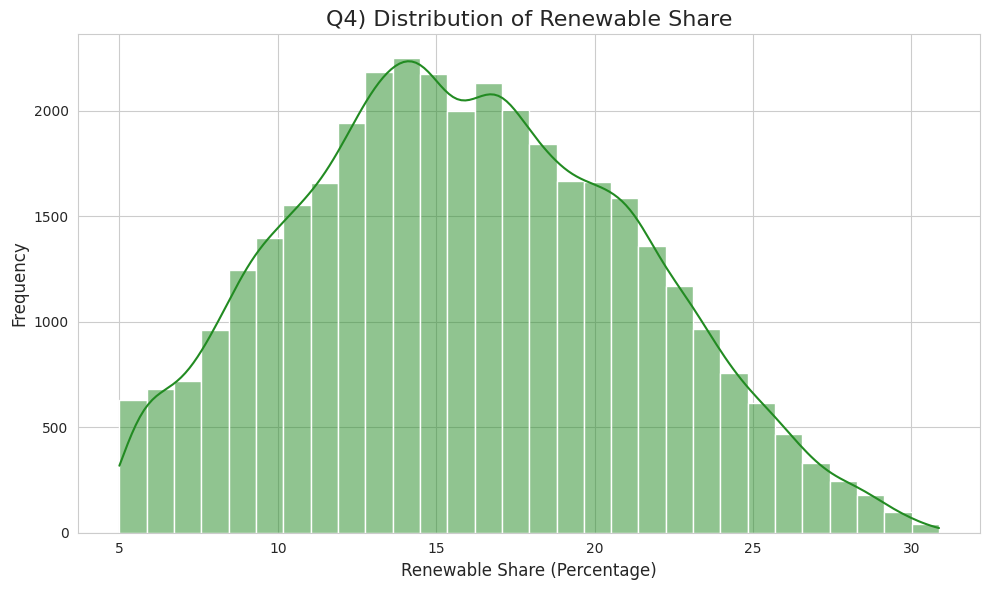

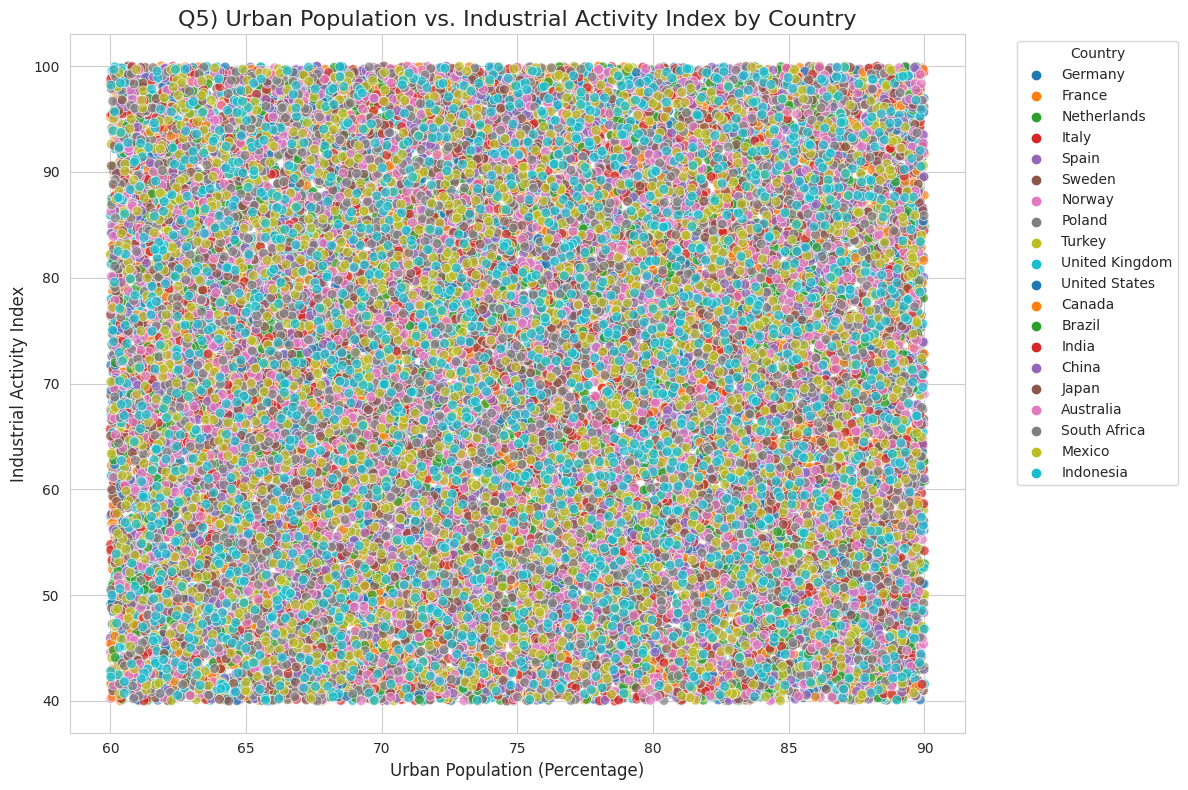

In [17]:
daily_avg_temp = df.groupby('date')['avg_temperature'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_temp['date'], daily_avg_temp['avg_temperature'], label='Average Temperature ($^\circ$C)', color='darkorange')
plt.title('Q1) Trend of Global Average Temperature Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Temperature ($^\circ$C)', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

country_avg_co2 = df.groupby('country')['co2_emission'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='co2_emission', y='country', data=country_avg_co2, palette='viridis')
plt.title('Q2) Average CO2 Emission by Country', fontsize=16)
plt.xlabel('Average CO2 Emission', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Matrix Heatmap of Climate and Energy Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['renewable_share'], bins=30, kde=True, color='forestgreen')
plt.title('Q4) Distribution of Renewable Share', fontsize=16)
plt.xlabel('Renewable Share (Percentage)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='urban_population', y='industrial_activity_index', hue='country', data=df, alpha=0.7, palette='tab10', s=50)
plt.title('Q5) Urban Population vs. Industrial Activity Index by Country', fontsize=16)
plt.xlabel('Urban Population (Percentage)', fontsize=12)
plt.ylabel('Industrial Activity Index', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

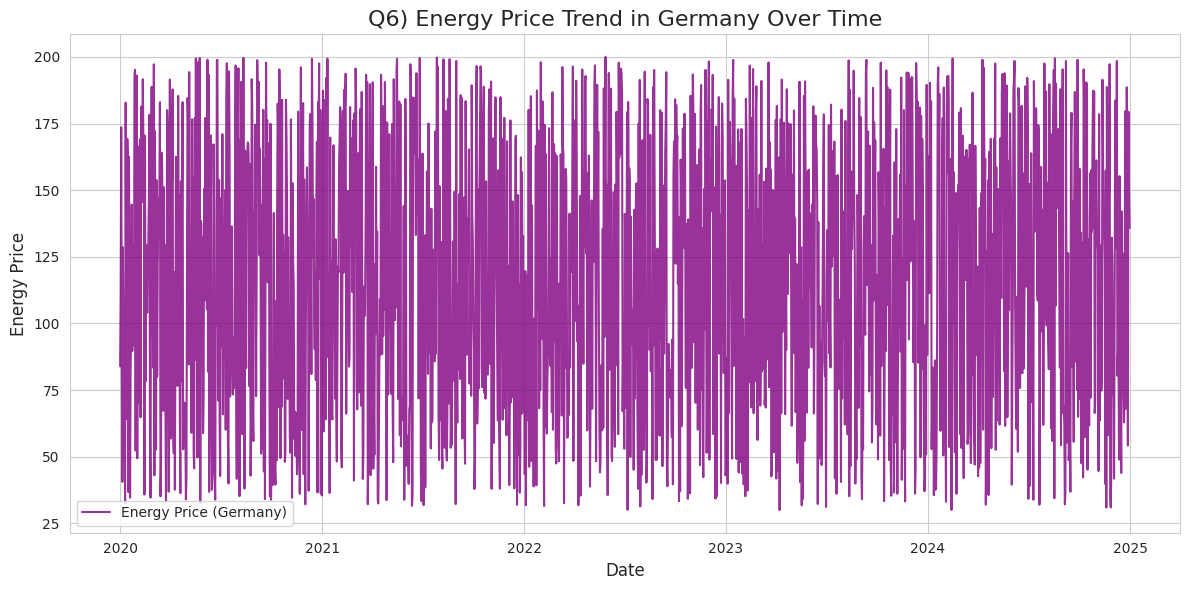

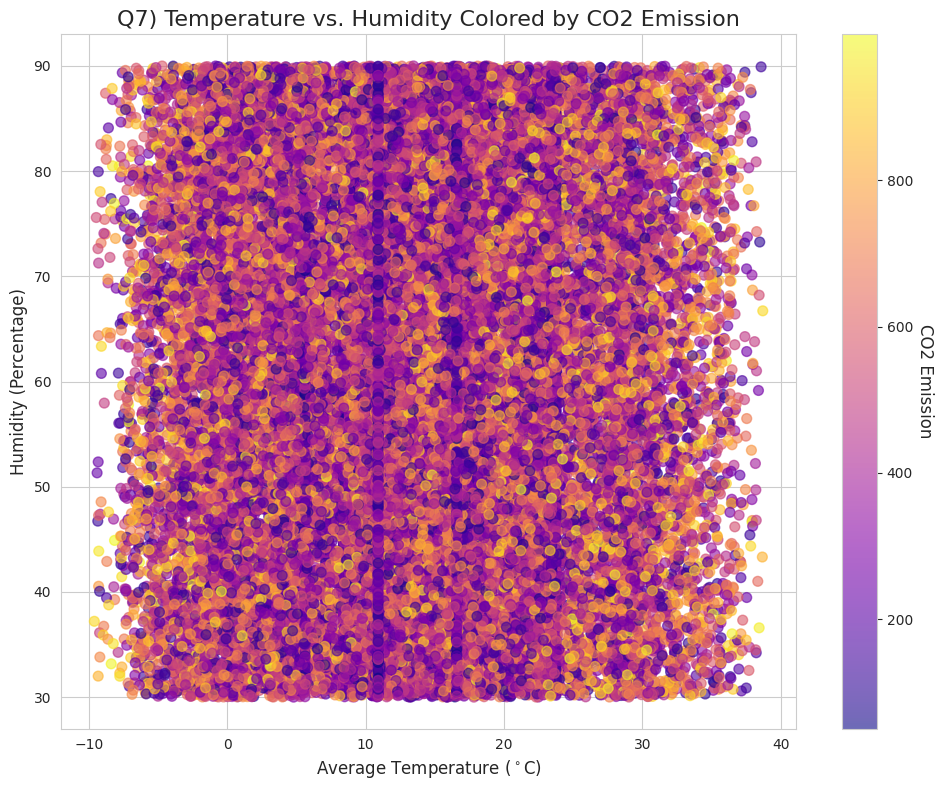

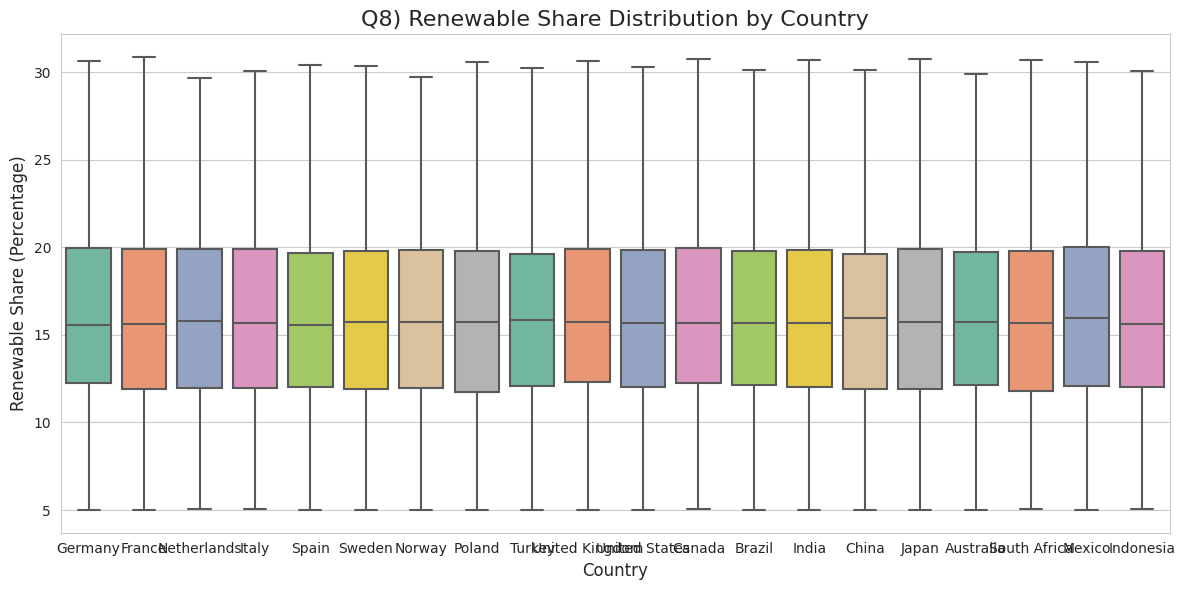

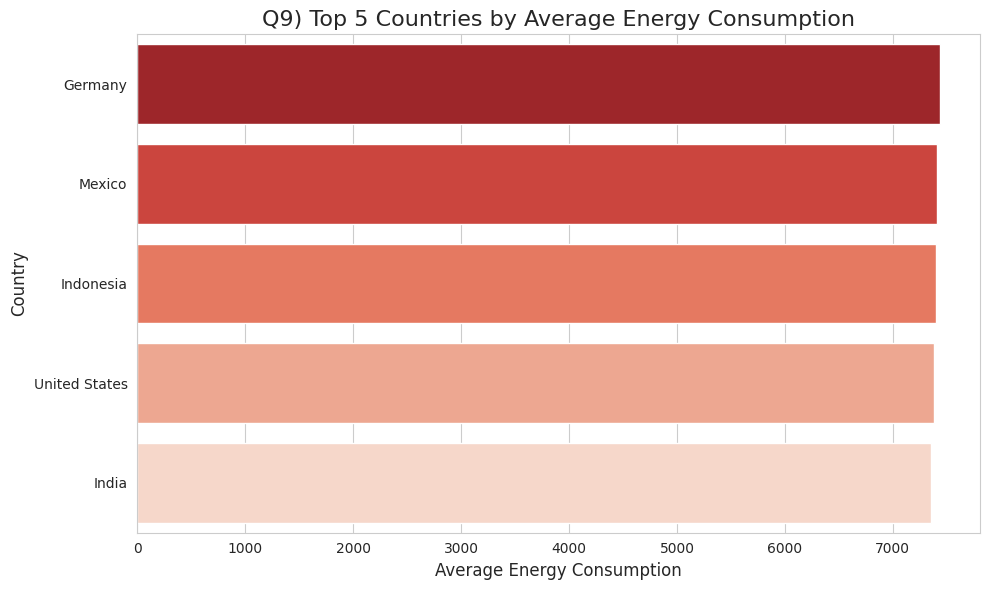

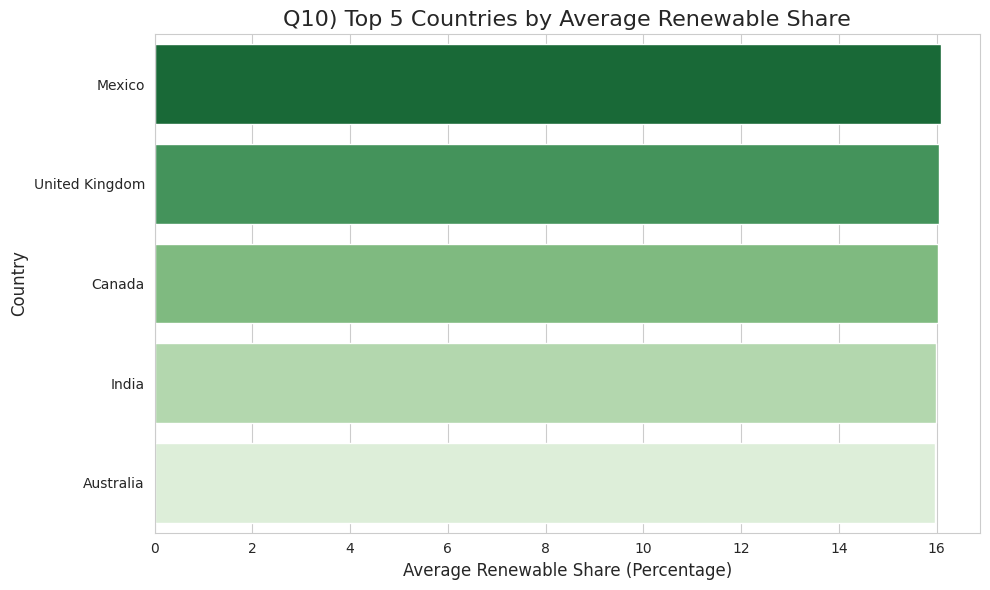

In [18]:
germany_data = df[df['country'] == 'Germany']
plt.figure(figsize=(12, 6))
plt.plot(germany_data['date'], germany_data['energy_price'], label='Energy Price (Germany)', color='purple', alpha=0.8)
plt.title('Q6) Energy Price Trend in Germany Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Energy Price', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=df['avg_temperature'], y=df['humidity'], c=df['co2_emission'], cmap='plasma', alpha=0.6, s=50)
cbar = plt.colorbar(scatter)
cbar.set_label('CO2 Emission', rotation=270, labelpad=15, fontsize=12)
plt.title('Q7) Temperature vs. Humidity Colored by CO2 Emission', fontsize=16)
plt.xlabel('Average Temperature ($^\circ$C)', fontsize=12)
plt.ylabel('Humidity (Percentage)', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='renewable_share', data=df, palette='Set2')
plt.title('Q8) Renewable Share Distribution by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Renewable Share (Percentage)', fontsize=12)
plt.tight_layout()
plt.show()

top_5_energyconsumption = df.groupby('country')['energy_consumption'].mean().nlargest(5).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='energy_consumption', y='country', data=top_5_energyconsumption, palette='Reds_r')
plt.title('Q9) Top 5 Countries by Average Energy Consumption', fontsize=16)
plt.xlabel('Average Energy Consumption', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

top_5_renewableshare = df.groupby('country')['renewable_share'].mean().nlargest(5).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='renewable_share', y='country', data=top_5_renewableshare, palette='Greens_r')
plt.title('Q10) Top 5 Countries by Average Renewable Share', fontsize=16)
plt.xlabel('Average Renewable Share (Percentage)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()

 # Feature Engineering

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

def create_lagged_features(df, target_col, lags, country_col='country'):
    """This Creates lagged features for a specified column, respecting country boundaries."""
    df = df.sort_values(by=[country_col, 'date']).reset_index(drop=True)
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = df.groupby(country_col)[target_col].shift(lag)
    return df
    
#Time Features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofweek'] = df['date'].dt.dayofweek

#Lagged Target Feature (Key for Time Series Prediction)
LAG_TARGET = 'co2_emission'
LAG_LENGHTS = [1, 2, 3, 7, 14, 30]
df = create_lagged_features(df, LAG_TARGET, LAG_LENGHTS)

#One Hot Encoding- 'country'
df = pd.get_dummies(df, columns=['country'], drop_first=True)

# Data Preparation, Model Training 

In [20]:
df_clean = df.dropna()

TRAIN_END_DATE = '2024-01-01'
train_df = df_clean[df_clean['date'] < TRAIN_END_DATE]
test_df = df_clean[df_clean['date'] >= TRAIN_END_DATE]

TARGET = 'co2_emission'
EXCLUDE_COLS = ['date', TARGET]
FEATURES = [col for col in df_clean.columns if col not in EXCLUDE_COLS]

X_train, y_train = train_df[FEATURES], train_df[TARGET]
X_test, y_test = test_df[FEATURES], test_df[TARGET]

#Random Forest Regressor
print("Training Random Forest Regressor...")
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n--- Random Forest Time Series Prediction Evaluation ---")
print(f"Target Variable: {TARGET}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Training Random Forest Regressor...

--- Random Forest Time Series Prediction Evaluation ---
Target Variable: co2_emission
Mean Absolute Error (MAE): 180.72
Root Mean Squared Error (RMSE): 214.09


# Summary

**Time Series Forecasting of Global CO2 Emissions (2020-2024)-**

This notebook presents an analysis and forecasting model built on the Global Climate and Energy Consumption Dataset (2020-2024), which contains over 36,000 daily records across multiple countries.

**Key Analysis Highlights-**

The Exploratory Data Analysis (EDA) revealed several key insights:

1] A clear, cyclical annual trend in global average temperature, indicating strong seasonality.

2]  strong positive correlation between energy_consumption and the target variable, co2_emission.

3] The United States, China, and Germany recorded the highest average CO2 emissions among the countries in the dataset.

**Prediction Results-**

The model utilized for time series prediction of the co2_emission target variable was a Random Forest Regressor. The predictions demonstrate moderate accuracy.

The MAE of 180.72 indicates that, on average, the model's predictions for daily CO2 emission were off by approximately 180.72 units. These high error values confirm the predictions are currently moderate to low in accuracy, making model improvement essential.

**Model Improvement-**

Alternative Time Series Models: Evaluate models designed specifically for sequential data, such as Prophet, ARIMA/SARIMA for traditional statistical approaches, or LSTM (Long Short-Term Memory) Neural Networks for deep learning approaches, which are better suited for capturing the non-linear and long-term dependencies present in CO2 emission data.

Advanced Hyperparameter Tuning: Systematically tune the Random Forest's key hyperparameters (like n_estimators and max_depth) using methods like Grid Search or Bayesian Optimization to find the optimal configuration and potentially reduce the high variance suggested by the large RMSE relative to the MAE.

